# Proyecto Biologia Computacional

### Unir varios archivos fasta

In [1]:
from Bio import SeqIO
import os

if __name__ == '__main__' :
    print('Procediendo a leer los ficheros de ./gen_material/')
    records = []

    for seq in os.listdir('gen_material/fasta') :
        fichero = open('gen_material/fasta/' + seq)
        record = SeqIO.read(fichero, 'fasta')
        records.append(record)

    print('Escribiendo fichero total...')
    SeqIO.write(records, 'totalsec.fasta', 'fasta')
    print('Finalizado.')



Procediendo a leer los ficheros de ./gen_material/
Escribiendo fichero total...
Finalizado.


### 1. Alineamiento de secuencias

Para el alineamiento usaremos una  herramienta en linea [online tool](https://www.ebi.ac.uk/Tools/msa/muscle/) __ebi__ que tiene como entrada un archivo `fasta` - el cual ya hemos creado.

#### Opción clwstrict 
Cuando descargamos el archivo tiene el siguiente nombre __muscle-I20190521-000553-0880-61726773-p1m__ luego cambiamos el nombre a __total.clustal__.

__Guardar alimeamiento__:
Guardamos el alineamiento hecho por la pagina __ebi__ con el nombre de __total.clustal__.


### 2. Cargar el alineamiento resultante

Usamos __AlignIO__ para leer el archivo de alineamiento en formato 'clustal'.

In [2]:
#Abrir el archivo de alineamiento
from Bio import AlignIO
with open("gen_material/total.clustal", "r") as aln:
    #usar AlignIO tpara leer el archivo de alineamiento en formato 'clustal' format
    alignment = AlignIO.read(aln, "clustal")

### 3. Creamos la matriz de distancias

In [3]:
from Bio.Phylo.TreeConstruction import DistanceCalculator

#calcular la  matriz de distancias
calculator = DistanceCalculator('identity')
# añade la matriz de  distancias al objeto calculator y lo retorna
dm = calculator.get_distance(alignment)
dm

DistanceMatrix(names=['AEC04503.1', 'AEH42425.1', 'AON77377.1', 'ADI80364.1', 'AJE26518.1', 'NP_944712.1', 'BAH23368.1', 'ACJ45788.1', 'ABM63279.1', 'YP_009178568.1', 'AIY56286.1'], matrix=[[0], [0.6340057636887608, 0], [0.6426512968299711, 0.17002881844380402, 0], [0.6570605187319885, 0.14409221902017288, 0.12968299711815567, 0], [0.7752161383285303, 0.5389048991354467, 0.5475504322766571, 0.5475504322766571, 0], [0.7492795389048992, 0.5072046109510087, 0.5100864553314122, 0.5100864553314122, 0.40634005763688763, 0], [0.7752161383285303, 0.5619596541786743, 0.5677233429394812, 0.579250720461095, 0.40634005763688763, 0.3025936599423631, 0], [0.7752161383285303, 0.5619596541786743, 0.5706051873198847, 0.5821325648414986, 0.4005763688760807, 0.3025936599423631, 0.025936599423631135, 0], [0.7694524495677233, 0.5533141210374639, 0.5475504322766571, 0.5590778097982709, 0.3948126801152738, 0.34005763688760804, 0.27665706051873196, 0.27953890489913547, 0], [0.7752161383285303, 0.5619596541786

### 4. Creamos el arbol UPGMA a partir de la matriz

In [4]:
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor

#initialize a DistanceTreeConstructor object based on our distance calculator object
constructor = DistanceTreeConstructor(calculator)

#build the tree
#upgma_tree = constructor.build_tree(alignment)
upgma_tree = constructor.upgma(dm)
upgma_tree

Tree(rooted=True)

__Mostrar el arbol__

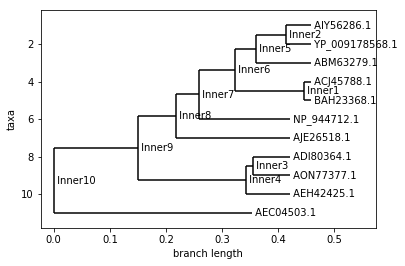

In [8]:
from Bio import Phylo
import pylab
#draw the tree
Phylo.draw(upgma_tree)

### 6. Grabamos el archivos en formato PhyloXML

In [6]:
import sys
#Grabamos  el arbol UPGMA
with open("gen_material/mytree_orchid_UPGMA.xml", "w") as f:
    Phylo.write(upgma_tree,f,"phyloxml")


### 7. Interfaz grafica

In [26]:
from tkinter import *
from tkinter.ttk import *
from PIL import Image, ImageTk

window = Tk()
window.title("App Biologia Computacional")
window.geometry('600x400')

#=======================================================================
frame0 = Frame(window) 

titulo = """  Analisis Genetico 
              de 
Especies Endemicas"""
 
#Titulo
lbl = Label(window, text=titulo, font=("Arial Bold", 14))
lbl.grid(column=1, row=0)

frame0.grid(column = 1, row = 0)

#======================FRAME 1=================================

frame1 = Frame(window)
#-----------------------------------------------------------------------
#Etique especies
lbl = Label(frame1, text="Especies", font=("Arial Bold", 14))
lbl.grid(column=1, row=1)
#-----------------------------------------------------------------------

# Botones y Check de las especies a seleccionar

check_state = []
num_especies = 10
#configuraciones
for i in range(num_especies):
    ch_st = BooleanVar()
    ch_st.set(0) #uncheck - aparesca deseleccionado
    check_state.append(ch_st)
    

check = []   #Lista de checks
boton = []   #Lista de botones
for i in range(num_especies):
    # checks
    ch = Checkbutton(frame1, text = 'Especie '+str(i+1), var = check_state[i])
    check.append(ch)
    # botones
    btn = Button(frame1, text="Info") 
    boton.append(btn)
    
#mostrat check
for i in range(num_especies):
    check[i].grid(column = 0, row = 3+i)
    boton[i].grid(column = 2, row = 3+i, rowspan=1)
    
#-----------------------------------------------------------------------   
frame1.grid(column = 0, row = 1)

#=======================FRAME 2=================================  

frame2=Frame(window)
#----------------------------------------------------------------------- 
# abrimos una imagen
im = Image.open('uni.png')
# Convertimos la imagen a un objeto PhotoImage de Tkinter
photo = ImageTk.PhotoImage(im)  

cv = Canvas(frame2, width=50, height=50)  
cv.create_image(0, 0, image = photo, anchor='nw')
cv.grid(column = 1, row = 2) 

#----------------------------------------------------------------------- 
#Boton de alimeamiento
boton_alineamiento = Button(frame2, text = "Alinear Secuencias") 
boton_alineamiento.grid(column = 4, row = 2)


#Boton de generar arbol
boton_get_tree = Button(frame2, text = "Generar arbol") 
boton_get_tree.grid(column = 4, row = 6)

frame2.grid(column = 1, row = 1)


window.mainloop()